In [2]:
 !python train.py --train_data ../data/train.csv --model_path ../models/initial_baseline.mdl 

sys:1: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
/home/pmolodyk/.local/lib/python3.9/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
[4.03658309e+15 6.19716617e+15 6.63002092e+15 2.08120702e+16
 4.25523953e+15 5.31065000e+14 2.25200260e+14 7.80228631e+14
 5.17236269e+14 8.97406172e+14 3.91891917e+15 4.15305986e+15
 1.32388205e+15 2.54411399e+15 2.98716062e+15 9.34536119e+16
 2.25523435e+15 6.06937753e+14 1.33210581e+15 1.70940666e+15
 2.19549256e+15 3.46110227e+14 2.11424289e+15 1.60582472e+15
 3.55240441e+15 8.72324117e+14 5.05316355e+15 1.24891648e+15
 1.62195936e+15 1.22010818e+15 1.04935327e+15 7.90079912e+14
 1.66137680e+15 1.57784485e+15 2.34967381e+15 5.50079717e+14
 4.26526770e+14 9.72254208e+14 8.29153799e+14 1.35338331e+15
 1.33810539e+15 4.93628955e+14 1.33920472e+15 6.79235612e+14
 9.01151702e+14 4.54091478e+15 7.22905438e

In [ ]:
CATEGORICAL_STE_FEATURES = ['region', 'realty_type']

# признаки, для которых применяем one hot encoding
CATEGORICAL_OHE_FEATURES = []

def cnt_ohe_ft(df):
    res = 0
    for ft in CATEGORICAL_OHE_FEATURES:
        res += 2**len(df[ft].value_counts())
    return res

# численные признаки
NUM_FEATURES = ['lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
      'osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005',
       'osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0.01',
       'osm_historic_points_in_0.005', 'osm_historic_points_in_0.0075',
       'osm_historic_points_in_0.01', 'osm_hotels_points_in_0.005',
       'osm_hotels_points_in_0.0075', 'osm_hotels_points_in_0.01',
       'osm_leisure_points_in_0.005', 'osm_leisure_points_in_0.0075',
       'osm_leisure_points_in_0.01', 'osm_offices_points_in_0.001',
       'osm_offices_points_in_0.005', 'osm_offices_points_in_0.0075',
       'osm_offices_points_in_0.01', 'osm_shops_points_in_0.001',
       'osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075',
       'osm_shops_points_in_0.01', 'osm_subway_closest_dist',
       'osm_train_stop_closest_dist', 'osm_train_stop_points_in_0.005',
       'osm_train_stop_points_in_0.0075', 'osm_train_stop_points_in_0.01',
       'osm_transport_stop_closest_dist', 'osm_transport_stop_points_in_0.005',
       'osm_transport_stop_points_in_0.0075',
       'osm_transport_stop_points_in_0.01',
       'reform_count_of_houses_1000', 'reform_count_of_houses_500',
       'reform_house_population_1000', 'reform_house_population_500',
       'reform_mean_floor_count_1000', 'reform_mean_floor_count_500',
       'reform_mean_year_building_1000', 'reform_mean_year_building_500','total_square',
        'price_type'
                # 'real_floor', 'floor_isna', 'high_floor', 'underground_floor', 'very_high_floor'
]

In [26]:
import pandas as pd
from raifhack_ds.model import BenchmarkModel, NUM_FEATURES

modelCls = BenchmarkModel.load('../models/resample')
model = modelCls.model
df = pd.read_csv('../data/df_train.csv.zip')

ImportError: cannot import name 'NUM_FEATURES' from 'raifhack_ds.model' (/home/pmolodyk/Documents/raifhack/baseline/raifhack_ds/model.py)

In [25]:
imp = model.feature_importances_
col = md.NUM_FEATURES
col.extend(md.CATEGORICAL_STE_FEATURES)

feature_imp = pd.DataFrame(sorted(zip(imp, col)), columns=['Value','Feature'])

AttributeError: module 'raifhack_ds.model' has no attribute 'NUM_FEATURES'

In [11]:
print(len(imp))
print(len(col))

70
77


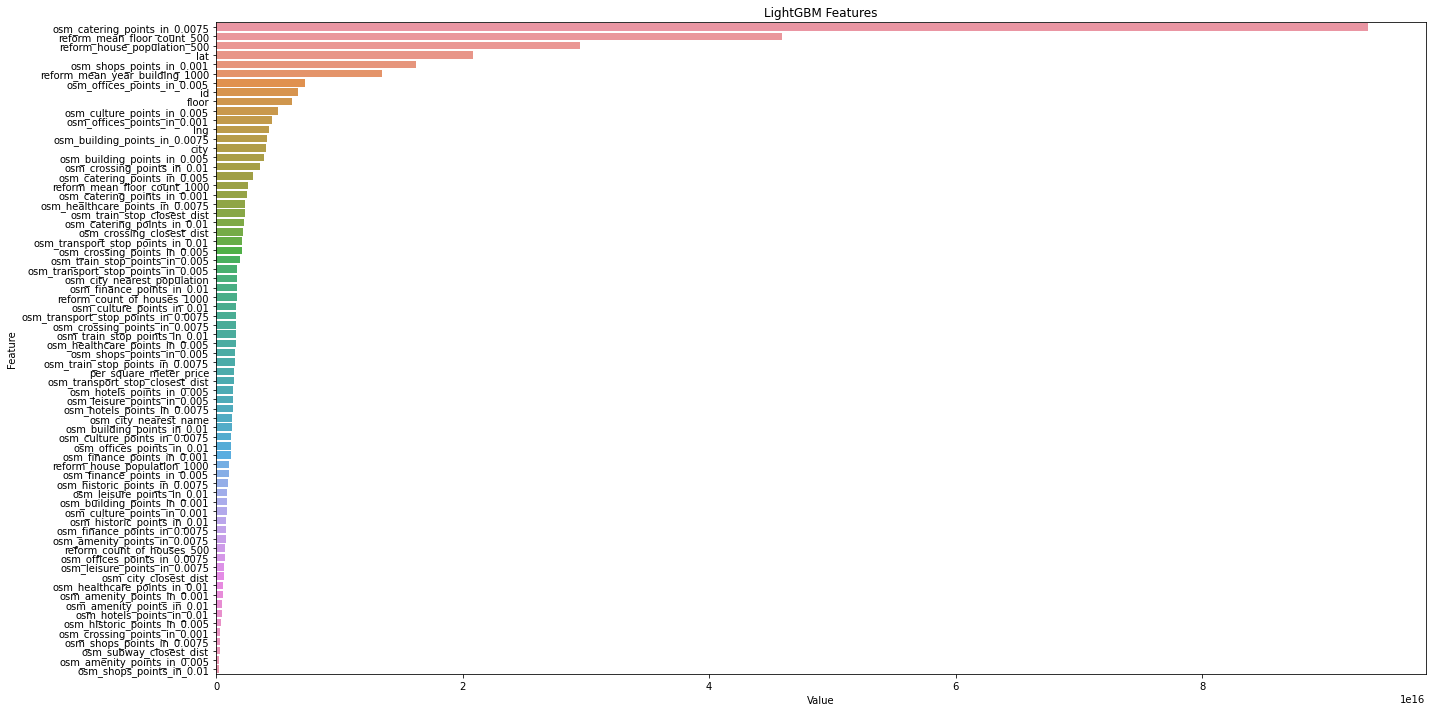

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')